In [27]:
import numpy as np
import matplotlib.pyplot as plt
import bm3d
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from skimage import io
from scipy import ndimage as nd
from skimage.morphology import disk
from skimage.filters import median
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma, denoise_nl_means)
from medpy.filter.smoothing import anisotropic_diffusion

In [2]:
ref_img = img_as_float(io.imread("Denoising/original_clean.tif", as_gray=True))
noisy_img = img_as_float(io.imread("Denoising/original_noisy.tif", as_gray=True))

In [24]:
gaussian_img = nd.gaussian_filter(noisy_img, sigma=4, mode='constant', cval=0.0)
noise_pnsr = peak_signal_noise_ratio(ref_img, noisy_img)
gaussian_pnsr = peak_signal_noise_ratio(ref_img, gaussian_img)

In [4]:
bilateral_img = denoise_bilateral(noisy_img, sigma_spatial=2, channel_axis=None)
bilateral_pnsr = peak_signal_noise_ratio(ref_img, bilateral_img)

In [5]:
tv_img = denoise_tv_chambolle(noisy_img, weight=0.4, channel_axis=None)
tv_pnsr = peak_signal_noise_ratio(ref_img, tv_img)

In [6]:
wavelet_img = denoise_wavelet(noisy_img, mode='soft',method='VisuShrink', channel_axis=None)
wavelet_pnsr = peak_signal_noise_ratio(ref_img, wavelet_img)

In [7]:
anisodiff_img = anisotropic_diffusion(noisy_img, niter=200, kappa=100, gamma=0.1, option=3)
anisodiff_pnsr = peak_signal_noise_ratio(ref_img, anisodiff_img)

/tmp/ipykernel_217920/2684644868.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  anisodiff_pnsr = peak_signal_noise_ratio(ref_img, anisodiff_img)


In [14]:
sigma_est = np.mean(estimate_sigma(noisy_img, channel_axis=None))
NLM_img = denoise_nl_means(noisy_img, h=1.95 * sigma_est, fast_mode=True, patch_distance=10, patch_size=20, channel_axis=None)
NLM_pnsr = peak_signal_noise_ratio(ref_img, NLM_img)

In [22]:
bm3d_img = bm3d.bm3d(noisy_img, sigma_psd=0.5, stage_arg=bm3d.BM3DStages.ALL_STAGES)
bm3d_pnsr = peak_signal_noise_ratio(ref_img, bm3d_img)

In [37]:
median_img = median(noisy_img, disk(3), mode='constant', cval=0.0)
median_pnsr = peak_signal_noise_ratio(ref_img, median_img)

Text(0.5, -0.09, 'median image (PNSR = 20.53095050292729)')

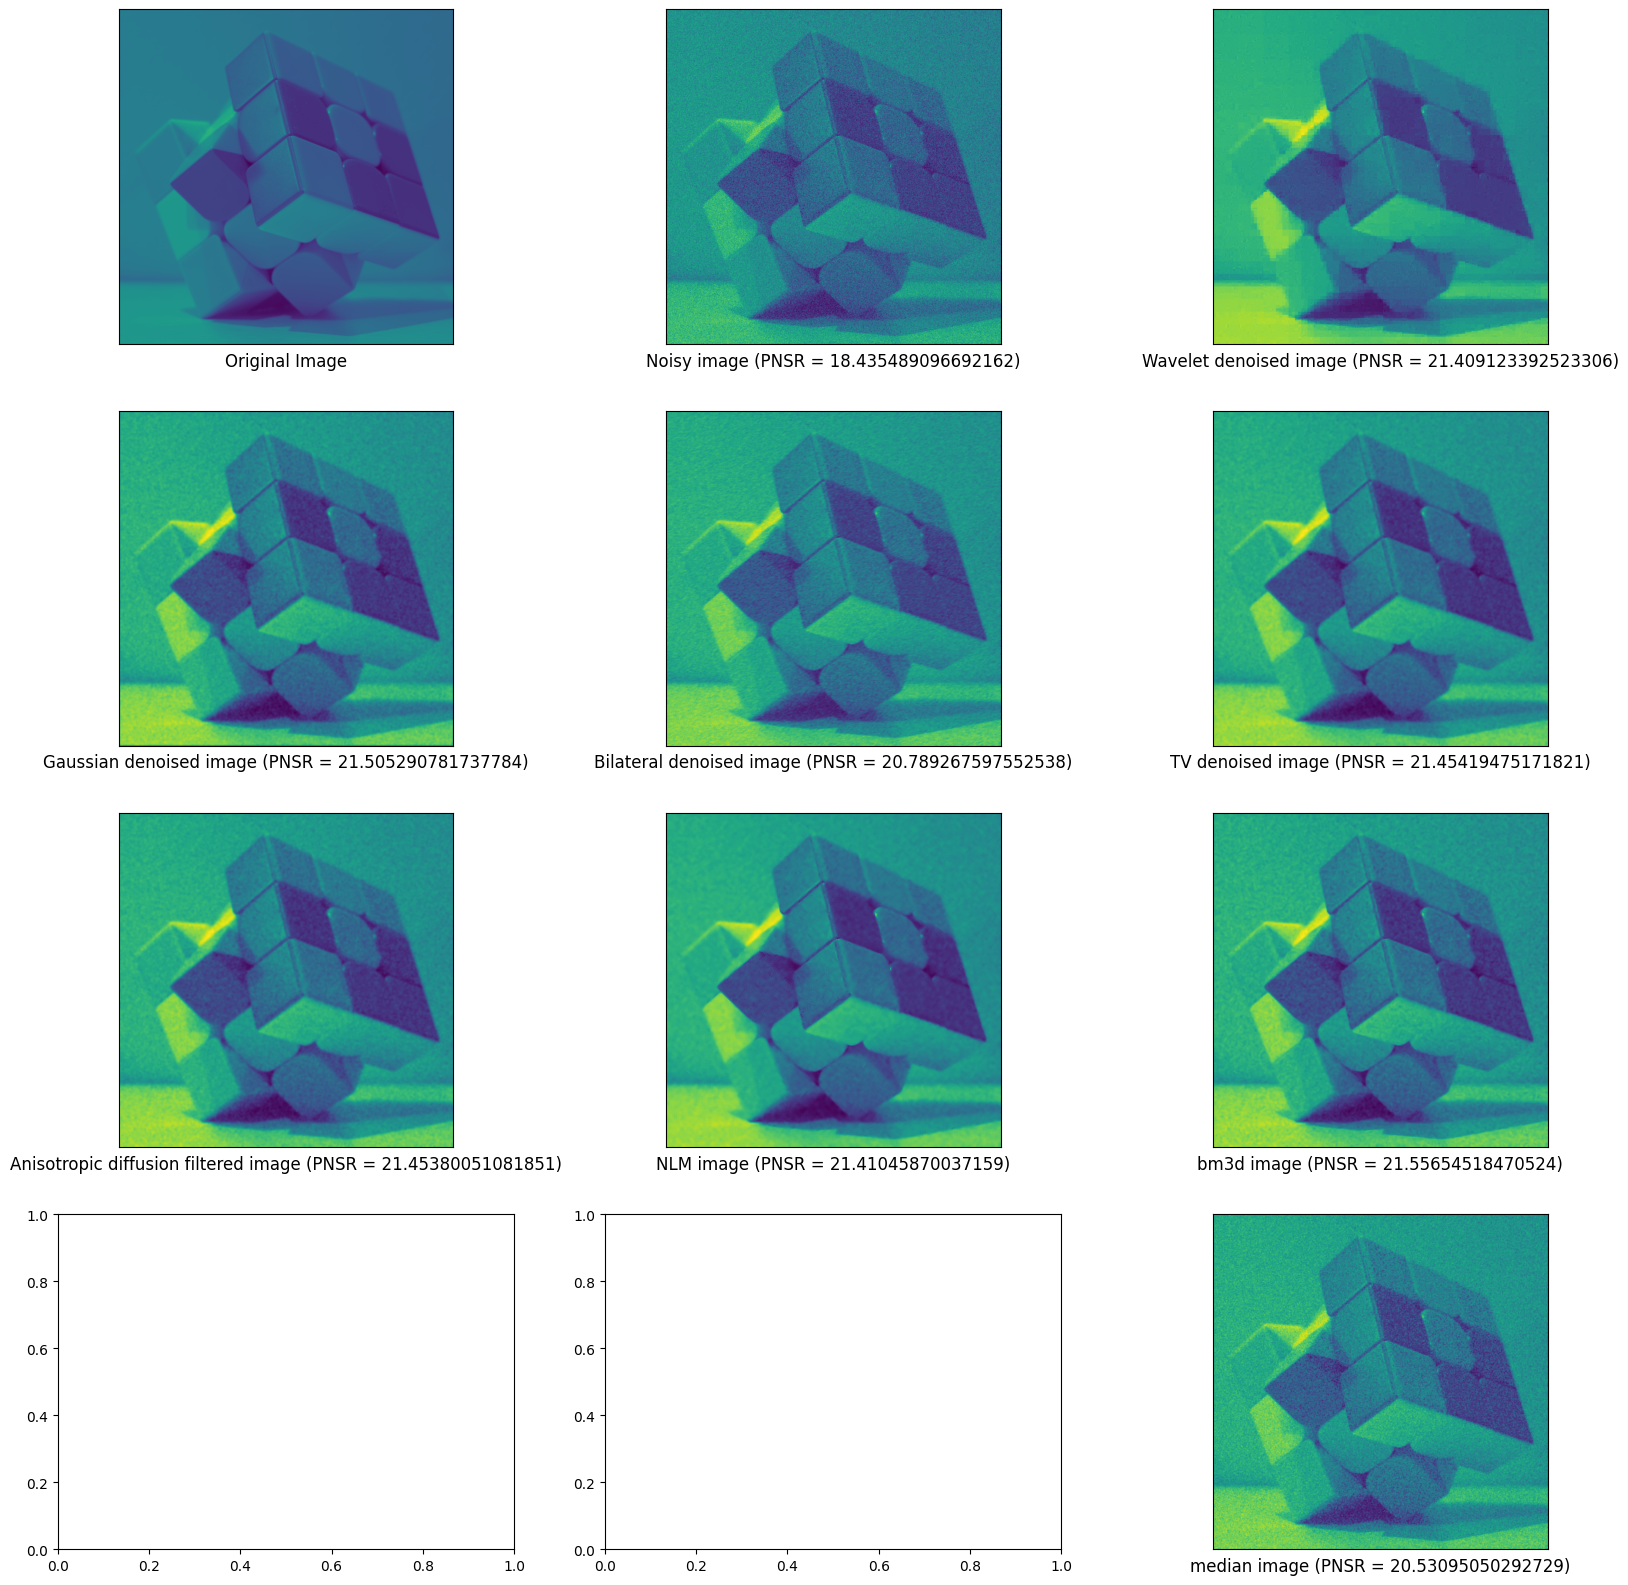

In [38]:
noise_title = "Noisy image (PNSR = {})".format(noise_pnsr)
gaussian_title = "Gaussian denoised image (PNSR = {})".format(gaussian_pnsr)
bilateral_title = "Bilateral denoised image (PNSR = {})".format(bilateral_pnsr)
tv_title = "TV denoised image (PNSR = {})".format(tv_pnsr)
wavelet_title = "Wavelet denoised image (PNSR = {})".format(wavelet_pnsr)
anisodiff_title = "Anisotropic diffusion filtered image (PNSR = {})".format(anisodiff_pnsr)
NLM_title = "NLM image (PNSR = {})".format(NLM_pnsr)
bm3d_title = "bm3d image (PNSR = {})".format(bm3d_pnsr)
median_title = "median image (PNSR = {})".format(median_pnsr)

figure, axis = plt.subplots(4, 3, figsize=(20,20))
axis[0,0].imshow(ref_img)
axis[0,0].set_xticks([])
axis[0,0].set_yticks([])
axis[0,0].set_title("Original Image", y=-0.09)

axis[0,1].imshow(noisy_img)
axis[0,1].set_xticks([])
axis[0,1].set_yticks([])
axis[0,1].set_title(noise_title, y=-0.09)

axis[0,2].imshow(wavelet_img)
axis[0,2].set_xticks([])
axis[0,2].set_yticks([])
axis[0,2].set_title(wavelet_title, y=-0.09)

axis[1,0].imshow(gaussian_img)
axis[1,0].set_xticks([])
axis[1,0].set_yticks([])
axis[1,0].set_title(gaussian_title, y=-0.09)

axis[1,1].imshow(bilateral_img)
axis[1,1].set_xticks([])
axis[1,1].set_yticks([])
axis[1,1].set_title(bilateral_title, y=-0.09)

axis[1,2].imshow(tv_img)
axis[1,2].set_xticks([])
axis[1,2].set_yticks([])
axis[1,2].set_title(tv_title, y=-0.09)

axis[2,0].imshow(anisodiff_img)
axis[2,0].set_xticks([])
axis[2,0].set_yticks([])
axis[2,0].set_title(anisodiff_title, y=-0.09)

axis[2,1].imshow(NLM_img)
axis[2,1].set_xticks([])
axis[2,1].set_yticks([])
axis[2,1].set_title(NLM_title, y=-0.09)

axis[2,2].imshow(bm3d_img)
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])
axis[2,2].set_title(bm3d_title, y=-0.09)

axis[3,2].imshow(median_img)
axis[3,2].set_xticks([])
axis[3,2].set_yticks([])
axis[3,2].set_title(median_title, y=-0.09)